In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as mdates

In [2]:
data = pd.read_csv("../data.csv", parse_dates = True)
data

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [3]:
data['Date'] = data['Date'].astype('datetime64[ns]')
data

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec
...,...,...,...,...,...,...,...
3441192,196,More Than You Know,Axwell /\ Ingrosso,2126,https://open.spotify.com/track/71bBFbfn2OBK5Qw...,2018-01-09,hk
3441193,197,Issues,Julia Michaels,2117,https://open.spotify.com/track/7vu0JkJh0ldukEY...,2018-01-09,hk
3441194,198,Tuo Fei Lun,Eason Chan,2112,https://open.spotify.com/track/0pmGleExiQyd0Hx...,2018-01-09,hk
3441195,199,面具,Alfred Hui,2102,https://open.spotify.com/track/58SUsgamkW6vFFq...,2018-01-09,hk


In [4]:
def extract_date(data, column):
    data[column + "_year"] = data[column].apply(lambda x: x.year)
    data[column + "_month"] = data[column].apply(lambda x: x.month)
extract_date(data, "Date")

In [5]:
data.count()

Position      3441197
Track Name    3440540
Artist        3440540
Streams       3441197
URL           3441189
Date          3441197
Region        3441197
Date_year     3441197
Date_month    3441197
dtype: int64

In [6]:
data = data.dropna(how='any')
data.count()

Position      3440540
Track Name    3440540
Artist        3440540
Streams       3440540
URL           3440540
Date          3440540
Region        3440540
Date_year     3440540
Date_month    3440540
dtype: int64

In [7]:
renamed_df = data.rename(columns={"Position": "Rank", "Track Name": "Song Name" })
renamed_df.head()

updated_df = renamed_df[["Rank","Song Name", "Artist", "Streams", "Date", "Region", "Date_year", "Date_month"]]
updated_df

position_df = (updated_df.loc[(data["Position"]<6),:])
position_df = pd.DataFrame(updated_df.loc[(data["Position"]<6),:])
position_df

,Rank,Song Name,Artist,Streams,Date,Region,Date_year,Date_month
0,1,Reggaetón Lento (Bailemos),CNCO,19272,2017-01-01,ec,2017,1
1,2,Chantaje,Shakira,19270,2017-01-01,ec,2017,1
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,2017-01-01,ec,2017,1
3,4,Vente Pa' Ca,Ricky Martin,14954,2017-01-01,ec,2017,1
4,5,Safari,J Balvin,14269,2017-01-01,ec,2017,1
...,...,...,...,...,...,...,...,...
3440997,1,Rewrite The Stars,Zac Efron,13012,2018-01-09,hk,2018,1
3440998,2,Wolves,Selena Gomez,12636,2018-01-09,hk,2018,1
3440999,3,Havana,Camila Cabello,12608,2018-01-09,hk,2018,1
3441000,4,Finesse (Remix) [feat. Cardi B],Bruno Mars,11309,2018-01-09,hk,2018,1


To find top songs

In [8]:
# Change Date according to quarter
date = position_df.loc[(pd.to_datetime(position_df["Date"]) > pd.to_datetime("2017-10-01")) & 
                       (pd.to_datetime(position_df["Date"]) <= pd.to_datetime("2017-12-31")),:]

date

date = date.groupby("Song Name").sum()
date

topstreams_date_global = date.sort_values("Streams", ascending = False)
topstreams_date_global

,Rank,Streams,Date_year,Date_month
Song Name,,,,
rockstar,4029,896977091,4647168,25231
Havana,5665,527960542,3967439,21620
New Rules,3490,364710843,1893963,9867
Wolves,2650,145735336,1811266,10204
Dusk Till Dawn - Radio Edit,3294,142278571,1950439,10007
...,...,...,...,...
We Wait for the Light,2,4793,2017,10
Don't Look Down - Radio Edit,2,3430,2017,12
Do You Still Want Me,3,2714,2017,10


In [9]:
shape_ofyou = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Shape of You")&
                                        (position_df["Date_year"]==2017),:])
shape_ofyou

global_shape= (shape_ofyou.loc[(shape_ofyou["Region"]=="global"),:]).index
global_shape

shape_ofyou.drop(global_shape , inplace=True)
shape_ofyou

shape_ofyou = shape_ofyou.groupby("Date_month").sum()
shape_ofyou

years_shape = pd.DataFrame(shape_ofyou["Streams"])
years_shape

,Streams
Date_month,
1,175147277
2,202102455
3,233465327
4,146431398
5,76270815
6,34299896
7,14326636
8,1495722
9,649873


In [10]:
castle = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Castle on the Hill")&
                                        (position_df["Date_year"]==2017),:])
castle = castle.sort_values("Date_month", ascending = False)
castle

global_castle = (castle.loc[(castle["Region"]=="global"),:]).index
global_castle

castle.drop(global_castle , inplace=True)
castle

castle = castle.groupby("Date_month").sum()
castle

years_castle = pd.DataFrame(castle["Streams"])
years_castle

,Streams
Date_month,
1,67281563
2,27122370
3,27677654
4,1758446


In [11]:
fifty_shades = position_df.loc[(position_df["Song Name"]=="I Don’t Wanna Live Forever (Fifty Shades Darker) - From \"Fifty Shades Darker (Original Motion Picture Soundtrack)\"") &
                               (position_df["Date_year"]==2017),:]
fifty_shades

global_fifty= (fifty_shades.loc[(fifty_shades["Region"]=="global"),:]).index
global_fifty

global_fifty.drop(global_fifty)
fifty_shades


fifty_shades = fifty_shades.sort_values("Date_month", ascending = False)
fifty_shades

fifty_shades = fifty_shades.groupby("Date_month").sum()
fifty_shades

years_fifty = pd.DataFrame(fifty_shades["Streams"])
years_fifty

,Streams
Date_month,
1,125238551
2,180614337
3,21751850
4,91421


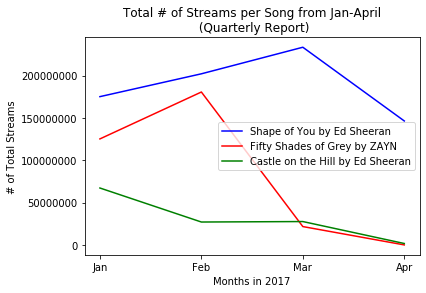

In [12]:
from matplotlib.ticker import FormatStrFormatter

x_axis = ["Jan", "Feb", "Mar", "Apr"]
y_axis_shape = [175147277,202102455, 233465327, 146431398]

fig, ax = plt.subplots()
shape = ax.plot(x_axis, y_axis_shape, color="blue", label="Shape of You by Ed Sheeran" )

fifty = ax.plot(x_axis,years_fifty.iloc[:,[0]], color="red", label="Fifty Shades of Grey by ZAYN" )

castle = ax.plot(x_axis, years_castle, color="green", label="Castle on the Hill by Ed Sheeran" )

plt.xlabel("Months in 2017")
plt.ylabel("# of Total Streams")
plt.title("Total # of Streams per Song from Jan-April\n (Quarterly Report)")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()

plt.show()

In [13]:
fig.savefig("./Images/Quarter1.png")

QUARTER 2

In [14]:
despacito = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Despacito (Featuring Daddy Yankee)")&
                                        (position_df["Date_year"]==2017),:])
despacito = despacito.sort_values("Date_month", ascending = False)
despacito

global_despacito= (despacito.loc[(despacito["Region"]=="global"),:]).index
global_despacito

despacito.drop(global_despacito , inplace=True)
despacito

despacito = despacito.groupby("Date_month").sum()
despacito

,Rank,Streams,Date_year
Date_month,,,
1,327,27606046,500216
2,689,72246058,1048840
3,727,67441671,1198098
4,1092,49462833,1125486
5,1127,46017353,750324
6,379,6262712,199683
7,29,68164,16136
11,36,107683,36306


In [15]:
humble = pd.DataFrame(position_df.loc[(position_df["Song Name"] == "HUMBLE.") & 
                                     (position_df["Date_year"]==2017),:])
humble = humble.sort_values("Date_month", ascending = False)

humble

# global_humble= (humble.loc[humble["Region"]=="global"),:]).index  <<--- NO GLOBAL DATA
# global_humble

# humble.drop(global_humble , inplace=True)
# humble

humble = humble.groupby("Date_month").sum()
humble

,Rank,Streams,Date_year
Date_month,,,
3,8,1963993,6051
4,828,224458081,740239
5,893,200800893,611151
6,632,105073849,348941
7,60,12692728,24204


In [16]:
the_one = pd.DataFrame(position_df.loc[(position_df["Song Name"] == "I'm the One") & 
                                     (position_df["Date_year"]==2017),:])
the_one = the_one.sort_values("Date_month", ascending = False)
the_one
global_one= (the_one.loc[(the_one["Region"]=="global"),:]).index
global_one

the_one.drop(global_one , inplace=True)
the_one

the_one = the_one.groupby("Date_month").sum()
the_one

,Rank,Streams,Date_year
Date_month,,,
4,52,5582318,32272
5,2275,134909468,1619651
6,2154,95024527,1274744
7,1160,51613600,609134
8,202,4874804,114969


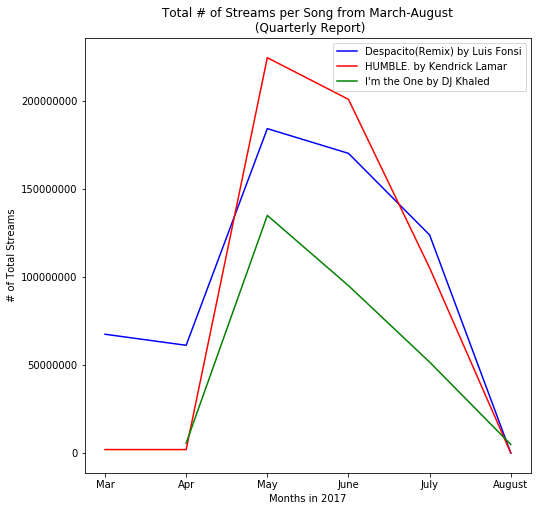

In [17]:
x_axis = [ "Mar","Apr", "May", "June", "July", "August"]
y_axis_despacito = [67441671, 61170701, 184182643, 170141881, 123781558, 0]
y_axis_humble = [1963993,1963993, 224458081, 200800893, 105073849, 0]
y_axis_one = [None,5582318, 134909468, 95024527, 51613600, 4874804]

fig, ax = plt.subplots(figsize=(8,8))
desp = ax.plot(x_axis, y_axis_despacito, color="blue", label="Despacito(Remix) by Luis Fonsi" )
hum = ax.plot(x_axis, y_axis_humble, color = "red", label = "HUMBLE. by Kendrick Lamar")
one = ax.plot(x_axis, y_axis_one, color = "green", label = "I'm the One by DJ Khaled")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.legend()
plt.xlabel("Months in 2017")
plt.ylabel("# of Total Streams")
plt.title("Total # of Streams per Song from March-August\n (Quarterly Report)")
plt.show()

In [18]:
fig.savefig("./Images/Quarter2.png")

QUARTER 3

In [19]:
mi_gente = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Mi Gente")&
                                        (position_df["Date_year"]==2017),:])
mi_gente = mi_gente.sort_values("Date_month", ascending = False)
mi_gente

global_gente= (mi_gente.loc[(mi_gente["Region"]=="global"),:]).index
global_gente

mi_gente.drop(global_gente , inplace=True)
mi_gente

mi_gente = mi_gente.groupby("Date_month").sum()
mi_gente

,Rank,Streams,Date_year
Date_month,,,
6,11,86781,6051
7,1085,49086161,1188013
8,2017,82650620,2033136
9,1716,58681882,1510733
10,354,5665852,171445


In [20]:
unforgettable= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Unforgettable")&
                                        (position_df["Date_year"]==2017),:])
unforgettable =unforgettable.sort_values("Date_month", ascending = False)
unforgettable

global_unforget= (unforgettable.loc[(unforgettable["Region"]=="global"),:]).index
global_unforget

unforgettable.drop(global_unforget , inplace=True)
unforgettable

unforgettable= unforgettable.groupby("Date_month").sum()
unforgettable

,Rank,Streams,Date_year
Date_month,,,
5,142,8861534,70595
6,880,25112130,455842
7,1212,57240047,762426
8,1158,66213146,770494
9,521,16362894,308601
10,101,802526,46391


In [21]:
wild_thoughts= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Wild Thoughts")&
                                        (position_df["Date_year"]==2017),:])
wild_thoughts =wild_thoughts.sort_values("Date_month", ascending = False)
wild_thoughts

# global_wild= (wild_thoughts.loc[wild_thoughts["Region"]=="global"),:]).index
# global_wild

# wild_thoughts.drop(global_wild , inplace=True)
# wild_thoughts

wild_thoughts= wild_thoughts.groupby("Date_month").sum()
wild_thoughts

,Rank,Streams,Date_year
Date_month,,,
6,645,97209040,453825
7,1547,219728644,1125486
8,796,113618118,486097
9,29,114707,12102


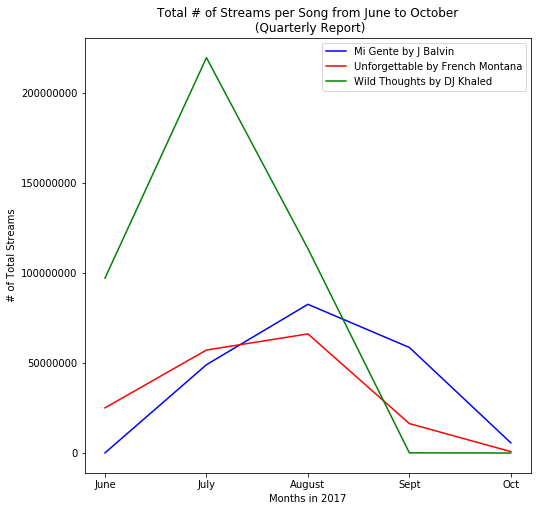

In [22]:
x_axis = [ "June","July", "August", "Sept","Oct" ]
y_axis_gente = [86781,49086161, 82650620, 58681882, 5665852]
y_axis_unforget = [25112130,57240047,66213146,16362894, 802526 ]
y_axis_wild= [97209040, 219728644, 113618118, 114707,0]

fig, ax = plt.subplots(figsize=(8,8))
gente = ax.plot(x_axis, y_axis_gente, color="blue", label="Mi Gente by J Balvin" )
unforgettable = ax.plot(x_axis, y_axis_unforget, color = "red", label = "Unforgettable by French Montana")
wild = ax.plot(x_axis, y_axis_wild, color = "green", label = "Wild Thoughts by DJ Khaled")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel("Months in 2017")
plt.ylabel("# of Total Streams")
plt.title("Total # of Streams per Song from June to October\n (Quarterly Report)")
plt.legend()
plt.show()

In [23]:
fig.savefig("./Images/Quarter3.png")

QUARTER 4

In [24]:
rockstar= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="rockstar")&
                                        (position_df["Date_year"]==2017),:])
rockstar = rockstar.sort_values("Date_month", ascending = False)
rockstar

global_rock= (rockstar.loc[(rockstar["Region"]=="global"),:]).index
global_rock

rockstar.drop(global_rock , inplace=True)
rockstar

rockstar= rockstar.groupby("Date_month").sum()
rockstar

,Rank,Streams,Date_year
Date_month,,,
9,459,78018216,629304
10,1153,168703080,1639821
11,1325,135138889,1514767
12,1488,100771939,1359458


In [25]:
havana= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Havana")&
                                        (position_df["Date_year"]==2017),:])
havana = havana.sort_values("Date_month", ascending = False)
havana

global_havana= (havana.loc[(havana["Region"]=="global"),:]).index
global_havana

havana.drop(global_havana , inplace=True)
havana

havana= havana.groupby("Date_month").sum()
havana

,Rank,Streams,Date_year
Date_month,,,
8,104,162654,48408
9,952,11128461,461893
10,1768,44532265,1095231
11,2168,94294853,1666042
12,1542,37943423,1044806


In [26]:
new_rules = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="New Rules")&
                                        (position_df["Date_year"]==2017),:])
new_rules = new_rules.sort_values("Date_month", ascending = False)
new_rules

global_rules= (new_rules.loc[(new_rules["Region"]=="global"),:]).index
global_rules

new_rules.drop(global_rules , inplace=True)
new_rules

new_rules= new_rules.groupby("Date_month").sum()
new_rules

,Rank,Streams,Date_year
Date_month,,,
7,22,166851,10085
8,771,23971436,518369
9,1627,44419203,1069010
10,1915,41465573,1123469
11,987,21350953,478029
12,359,6023547,159343


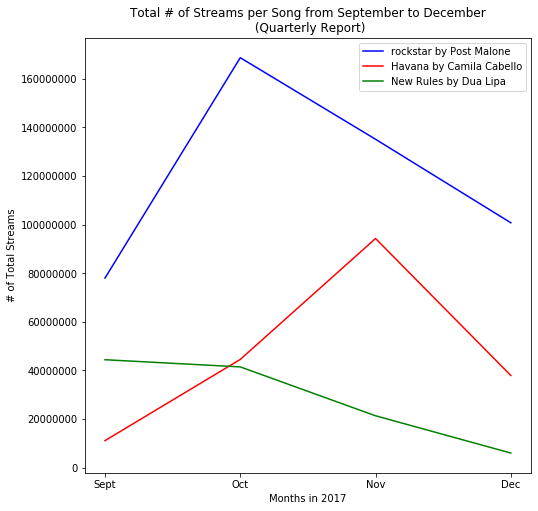

In [27]:
x_axis = [ "Sept","Oct", "Nov", "Dec" ]
y_axis_rock = [78018216,168703080,135138889, 100771939]
y_axis_havana = [11128461,44532265,94294853,37943423 ]
y_axis_rules= [44419203, 41465573,21350953, 6023547]

fig, ax = plt.subplots(figsize=(8,8))
rock = ax.plot(x_axis, y_axis_rock, color="blue", label="rockstar by Post Malone" )
Havana = ax.plot(x_axis, y_axis_havana, color = "red", label = "Havana by Camila Cabello")
rules = ax.plot(x_axis, y_axis_rules, color = "green", label = "New Rules by Dua Lipa")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel("Months in 2017")
plt.ylabel("# of Total Streams")
plt.title("Total # of Streams per Song from September to December\n (Quarterly Report)")
plt.legend()
plt.show()

In [28]:
fig.savefig("./Images/Quarter4.png")

CHRISTMAS SPECIAL

In [29]:
want_for_christmas= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="All I Want for Christmas Is You")&
                                        (position_df["Date_year"]==2017),:])
want_for_christmas = want_for_christmas.sort_values("Date_month", ascending = False)
want_for_christmas

global_want= (want_for_christmas.loc[(want_for_christmas["Region"]=="global"),:]).index
global_want

want_for_christmas.drop(global_want , inplace=True)
want_for_christmas

month_for_christmas= want_for_christmas.groupby("Date_month").sum()
month_for_christmas

,Rank,Streams,Date_year
Date_month,,,
11,30,252276,16136
12,1152,54376604,913701


In [30]:
last_christmas= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Last Christmas")&
                                        (position_df["Date_year"]==2017),:])
last_christmas = last_christmas.sort_values("Date_month", ascending = False)
last_christmas

global_last= (last_christmas.loc[(last_christmas["Region"]=="global"),:]).index
global_last

last_christmas.drop(global_last , inplace=True)
last_christmas

month_christmas= last_christmas.groupby("Date_month").sum()
month_christmas

,Rank,Streams,Date_year
Date_month,,,
11,8,125827,4034
12,753,32602497,488114


In [31]:
# know_christmas= pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Do They Know It's Christmas? - 1984 Version")&
#                                         (position_df["Date_year"]==2017),:])
# know_christmas = know_christmas.sort_values("Date_month", ascending = False)
# know_christmas

# global_know= (know_christmas.loc[(know_christmas["Region"]=="global"),:]).index
# global_know

# know_christmas.drop(global_know , inplace=True)
# know_christmas

# know_christmas= know_christmas.groupby("Date_month").sum()
# know_christmas

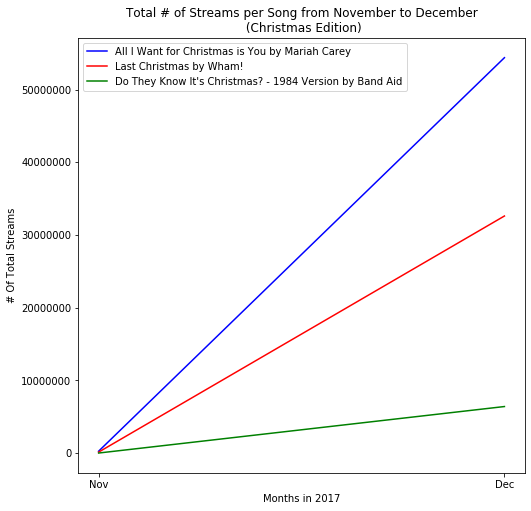

In [32]:
x_axis = ["Nov", "Dec"]

y_axis_know = [0, 6395145]
y_month_christmas = [125827,32602497 ]
y_axis_for_christmas = [252276,54376604 ]

fig, ax = plt.subplots(figsize=(8,8))
want = ax.plot(x_axis, y_axis_for_christmas, color = "blue", label = "All I Want for Christmas is You by Mariah Carey")
# last = ax.plot(x_axis, last_christmas, color = "red", label = "Last Christmas by Wham!")
last = ax.plot (x_axis, y_month_christmas, color = "red", label = "Last Christmas by Wham!")
know = ax.plot (x_axis, y_axis_know, color = "green", label = "Do They Know It's Christmas? - 1984 Version by Band Aid")

ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
# plt.ylim(100000, 50000000)

# yticks = np.arange(0, 50000000, step=10000)
# start, end = ax.get_xlim()
# ax.xaxis.set_ticks(np.arange(start, end, 10000))
plt.xlabel("Months in 2017")
plt.ylabel("# Of Total Streams")
plt.title("Total # of Streams per Song from November to December\n (Christmas Edition)")

plt.legend()
plt.show()

In [33]:
fig.savefig("./Images/Christmas.png")

Throughout the Year

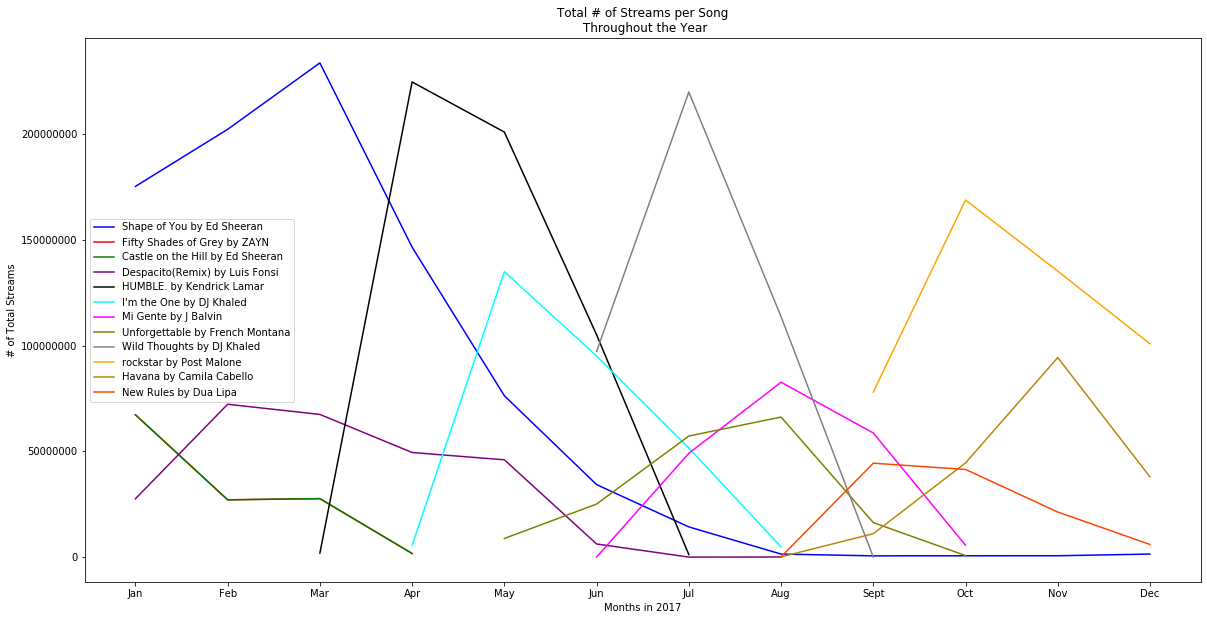

In [34]:
x_axis = ["Jan","Feb","Mar", "Apr", "May","Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec"]

y_axis_fity = [67281563, 27122370, 27677654, 1758446, None, None, None, None, None, None, None, None,]
y_axis_castle = [67281563, 27122370, 27677654, 1758446,None, None, None, None, None, None, None, None]

y_axis_despacito = [27606046, 72246058, 67441671, 49462833, 46017353, 6262712, 68164, 107683, None,None,None,None]
y_axis_humble = [None, None,1963993, 224458081, 200800893, 105073849, 1269728,None,None,None,None, None]
y_axis_one = [None, None, None,5582318, 134909468, 95024527, 51613600, 4874804, None,None,None,None]

y_axis_gente = [None,None,None,None,None,86781,49086161, 82650620, 58681882, 5665852, None, None]
y_axis_unforget = [None,None,None,None,8861534,25112130,57240047,66213146,16362894, 802526,None,None]
y_axis_wild= [None,None,None,None,None,97209040, 219728644, 113618118, 114707,None,None,None]

y_axis_rock = [None,None,None,None,None,None,None,None,78018216,168703080,135138889, 100771939]
y_axis_havana = [None,None,None,None,None,None,None,162654,11128461,44532265,94294853,37943423 ]
y_axis_rules= [None,None,None,None,None,None,None, 166851, 44419203, 41465573,21350953, 6023547]

fig, ax = plt.subplots(figsize=(20,10))
shape = ax.plot(x_axis, years_shape, color="blue", label="Shape of You by Ed Sheeran" )

fifty = ax.plot(x_axis,y_axis_fity, color="red", label="Fifty Shades of Grey by ZAYN" )

castle = ax.plot(x_axis, y_axis_castle, color="green", label="Castle on the Hill by Ed Sheeran" )

desp = ax.plot(x_axis, y_axis_despacito, color="purple", label="Despacito(Remix) by Luis Fonsi" )
hum = ax.plot(x_axis, y_axis_humble, color = "black", label = "HUMBLE. by Kendrick Lamar")
one = ax.plot(x_axis, y_axis_one, color = "cyan", label = "I'm the One by DJ Khaled")

gente = ax.plot(x_axis, y_axis_gente, color="magenta", label="Mi Gente by J Balvin" )
unforgettable = ax.plot(x_axis, y_axis_unforget, color = "olive", label = "Unforgettable by French Montana")
wild = ax.plot(x_axis, y_axis_wild, color = "gray", label = "Wild Thoughts by DJ Khaled")

rock = ax.plot(x_axis, y_axis_rock, color="orange", label="rockstar by Post Malone" )
Havana = ax.plot(x_axis, y_axis_havana, color = "darkgoldenrod", label = "Havana by Camila Cabello")
rules = ax.plot(x_axis, y_axis_rules, color = "orangered", label = "New Rules by Dua Lipa")
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

plt.xlabel("Months in 2017")
plt.ylabel("# of Total Streams")
plt.title("Total # of Streams per Song\n Throughout the Year")
plt.legend()
plt.autoscale(enable=True, axis='both', tight=None)
plt.show()


In [35]:
fig.savefig("./Images/Yearly.png")

Songs Sparced by Region

In [36]:
one_song = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Shape of You")&
                                        (position_df["Date_year"]==2017),:])
one_song

one_df = one_song.drop_duplicates(subset=["Song Name", "Region"], keep = "first", inplace = False)
one_df.head()

,Rank,Song Name,Artist,Streams,Date,Region,Date_year,Date_month
1603,4,Shape of You,Ed Sheeran,12200,2017-01-09,ec,2017,1
75200,1,Shape of You,Ed Sheeran,113479,2017-01-06,fr,2017,1
157004,5,Shape of You,Ed Sheeran,142451,2017-02-13,ar,2017,2
223601,2,Shape of You,Ed Sheeran,94929,2017-01-06,fi,2017,1
297801,2,Shape of You,Ed Sheeran,135566,2017-01-06,no,2017,1


In [37]:
despacito = pd.DataFrame(position_df.loc[(position_df["Song Name"]=="Despacito - Remix")&
                                        (position_df["Date_year"]==2017),:])
despacito

despacito_one = despacito.drop_duplicates(subset=["Song Name", "Region"], keep = "first", inplace = False)
despacito_one.head()

,Rank,Song Name,Artist,Streams,Date,Region,Date_year,Date_month
21200,1,Despacito - Remix,Luis Fonsi,21030,2017-04-17,ec,2017,4
96804,5,Despacito - Remix,Luis Fonsi,82032,2017-04-24,fr,2017,4
169600,1,Despacito - Remix,Luis Fonsi,259697,2017-04-17,ar,2017,4
244201,2,Despacito - Remix,Luis Fonsi,67826,2017-04-19,fi,2017,4
318403,4,Despacito - Remix,Luis Fonsi,122097,2017-04-19,no,2017,4


/Users/mansi/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


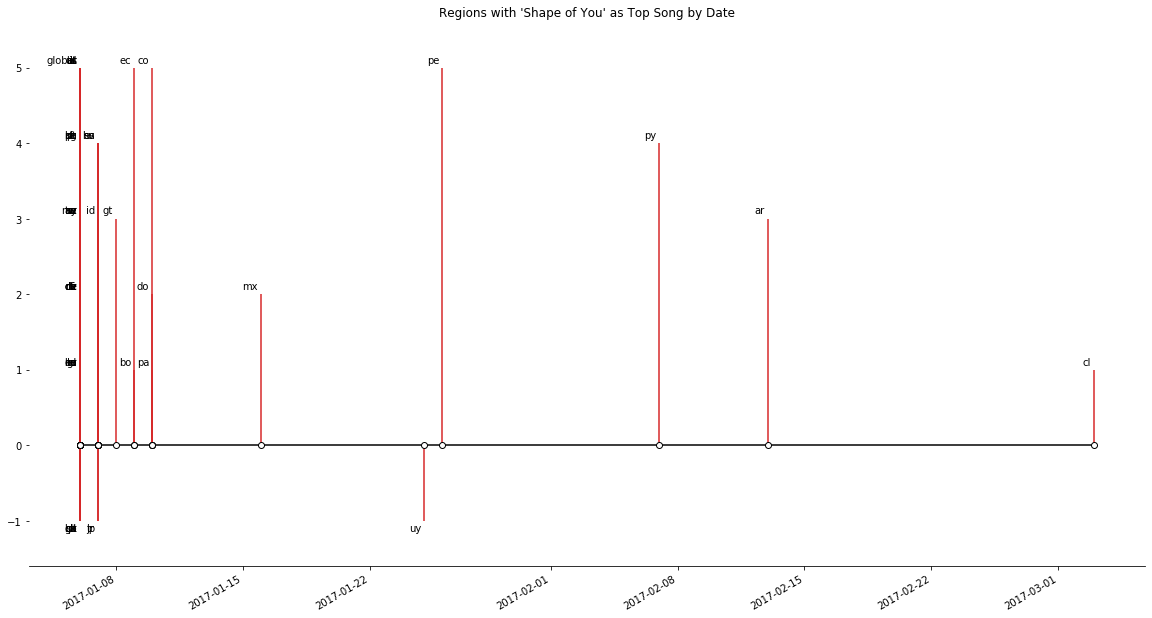

In [38]:
dates = one_df["Date"]
dates


names = one_df["Region"]
# Choose some nice levels
levels = np.tile([5, 4, 3, 2, 1, -1],
                 int(np.ceil(len(dates))))[:len(dates)]


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20,10), constrained_layout=False)
ax.set(title="Regions with 'Shape of You' as Top Song by Date")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates,levels,names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
# ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
# ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
# 
# remove y axis and spines
ax.get_yaxis().set_visible(True)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [39]:
fig.savefig("./Images/Geography_Shape_of_you.png")

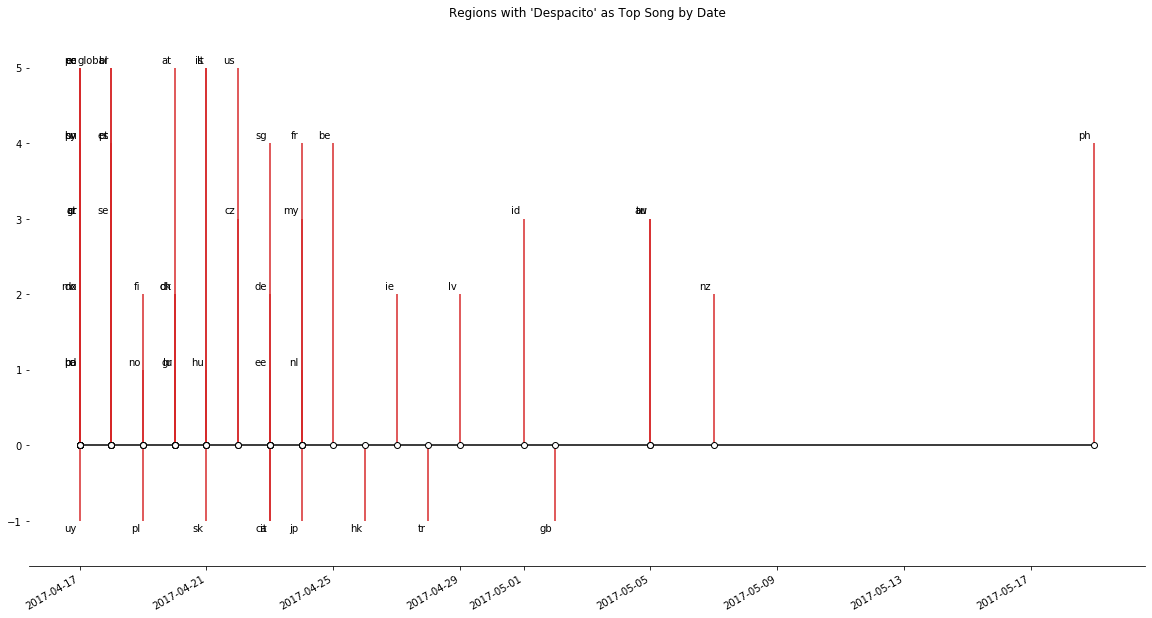

In [40]:
des_dates = despacito_one["Date"]



des_names = despacito_one["Region"]
# Choose some nice levels
levels = np.tile([5, 4, 3, 2, 1, -1],
                 int(np.ceil(len(des_dates))))[:len(des_dates)]


# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(20,10), constrained_layout=False)
ax.set(title="Regions with 'Despacito' as Top Song by Date")

markerline, stemline, baseline = ax.stem(des_dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(des_dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(des_dates,levels,des_names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="right")

# format xaxis with 4 month intervals
# ax.get_xaxis().set_major_locator(mdates.MonthLocator(interval=1))
# ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
# 
# remove y axis and spines
ax.get_yaxis().set_visible(True)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ax.margins(y=0.1)
plt.show()

In [41]:
fig.savefig("./Images/Geography_Despacito.png")

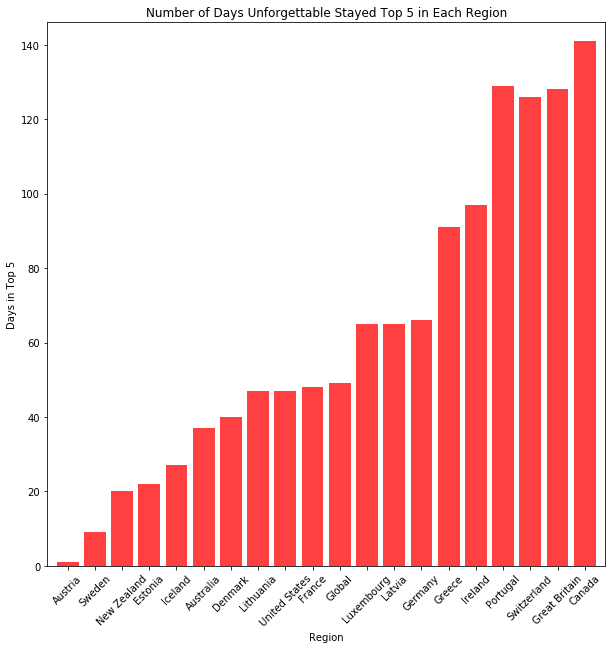

In [42]:
regions = ['Austria', 'Sweden', 'New Zealand', 'Estonia', 'Iceland',
       'Australia', 'Denmark', 'Lithuania', 'United States', 'France',
       'Global', 'Luxembourg', 'Latvia', 'Germany', 'Greece', 'Ireland',
        'Portugal', 'Switzerland', 'Great Britain', 'Canada']

day_count = [1,9,20,22,27,37,40,47,47,48,49,65,65,66,91,97,129,126,128,141]
fig, ax = plt.subplots(figsize=(10,10), constrained_layout=False)
x_axis = np.arange(0, len(regions))
plt.title('Number of Days Unforgettable Stayed Top 5 in Each Region')
plt.xlabel('Region')
plt.ylabel('Days in Top 5')

plt.xlim(-.75, len(regions)-.25)
plt.ylim(0, max(day_count) + 5)
plt.bar(x_axis, day_count, facecolor="red", alpha=0.75, align="center")
plt.xticks(x_axis, regions)
plt.xticks(rotation=45)
plt.show()


In [43]:
fig.savefig("./Images/bar_graph.png")